In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("dataset.csv")

print("Dataset Info:")
data.info()

print("\nMissing Values Summary:")
print(data.isnull().sum())

print("\nBasic Statistics:")
print(data.describe(include="all"))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Missing Values Summary:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Basic Statistics:
       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      337.000000     342.000000         342.000000   
unique       3      

In [12]:
# Numeric columns: Fill missing with median
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Categorical columns: Fill missing with mode
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify missing values are handled
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [16]:
# Filtering the dataset for Gentoo penguins and compute the mean body mass
gentoo_avg_body_mass = data[data['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body_mass_g for Gentoo penguins: {gentoo_avg_body_mass:.2f}")


Average body_mass_g for Gentoo penguins: 5125.00


In [18]:
from scipy.stats import skew, kurtosis

#  skewness and kurtosis for each feature and species
print("Skewness and Kurtosis by Species:")
for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"\nFeature: {feature}")
    for species in data['species'].unique():
        species_data = data[data['species'] == species][feature].dropna()
        print(f"  {species}:")
        print(f"    Skewness: {skew(species_data):.2f}")
        print(f"    Kurtosis: {kurtosis(species_data):.2f}")


Skewness and Kurtosis by Species:

Feature: bill_length_mm
  Adelie:
    Skewness: 0.17
    Kurtosis: -0.22
  Gentoo:
    Skewness: 0.72
    Kurtosis: 1.18
  Chinstrap:
    Skewness: -0.09
    Kurtosis: -0.12

Feature: bill_depth_mm
  Adelie:
    Skewness: 0.33
    Kurtosis: -0.10
  Gentoo:
    Skewness: 0.35
    Kurtosis: -0.58
  Chinstrap:
    Skewness: 0.01
    Kurtosis: -0.90


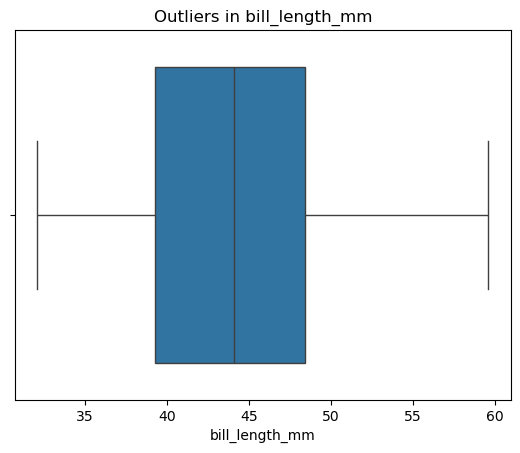

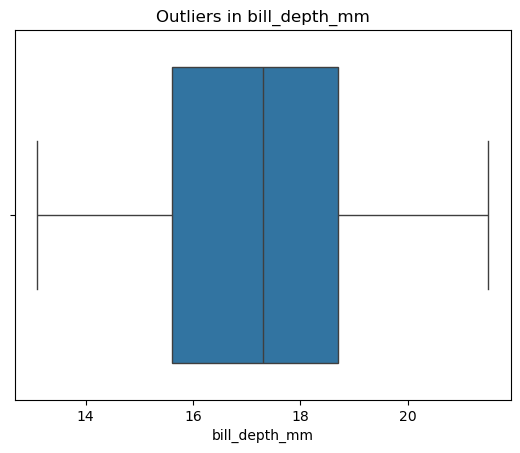

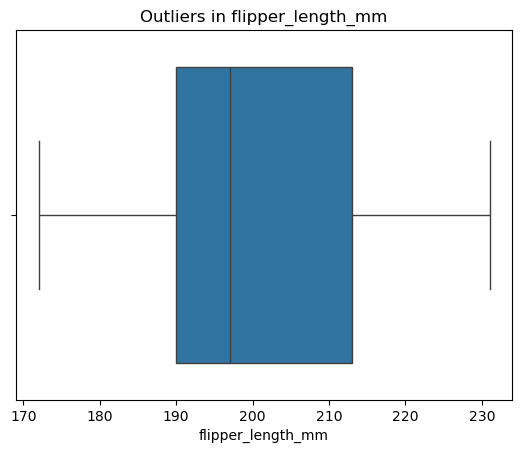

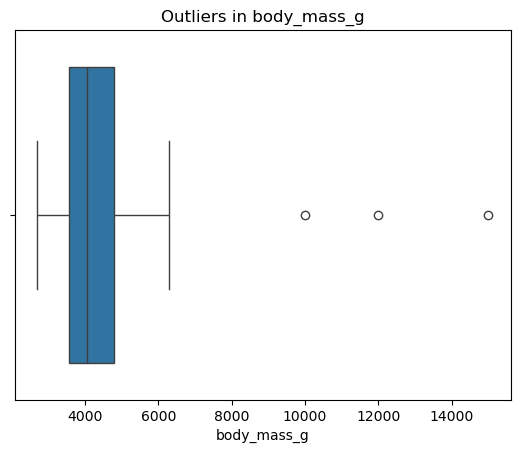

In [20]:
# IQR method for outlier detection
outliers = {}
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]

    # Boxplot visualization
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)
    plt.show()


Explained Variance Ratios:
  PC1: 0.62
  PC2: 0.20
  PC3: 0.13
  PC4: 0.05


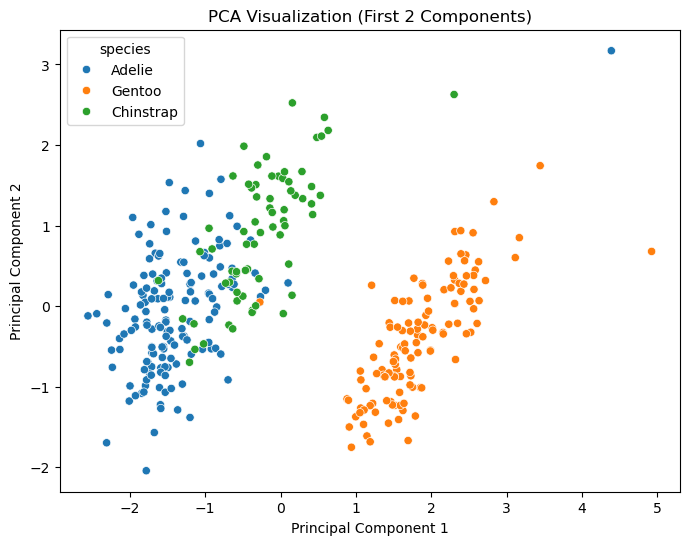

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratios
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
for i, var in enumerate(explained_variance):
    print(f"  PC{i + 1}: {var:.2f}")

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data["species"])
plt.title("PCA Visualization (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


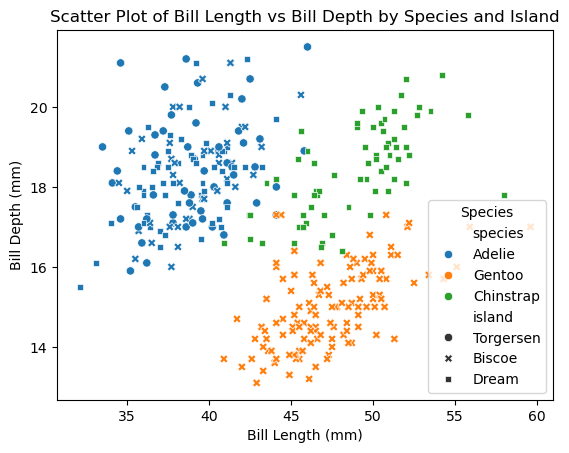

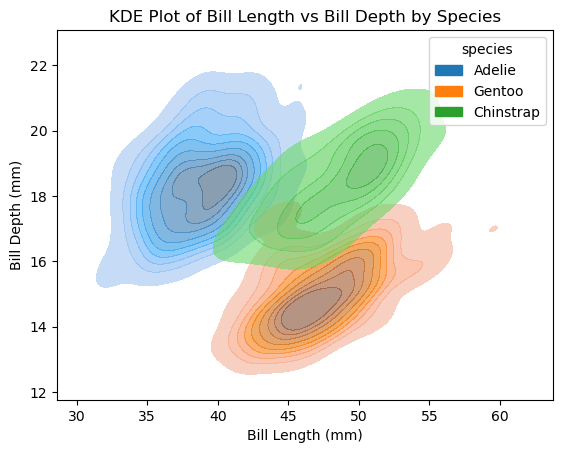

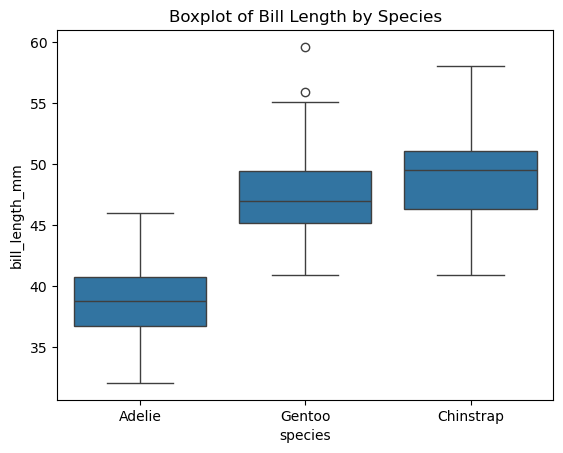

In [24]:
# Scatter plot
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', style='island')
plt.title("Scatter Plot of Bill Length vs Bill Depth by Species and Island")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend(title="Species")
plt.show()

# KDE plot
sns.kdeplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True, alpha=0.6)
plt.title("KDE Plot of Bill Length vs Bill Depth by Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Additional visualizations
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title("Boxplot of Bill Length by Species")
plt.show()


In [26]:
# Group by species and island to find the maximum flipper length
max_flipper_per_island = data.groupby(['species', 'island'])['flipper_length_mm'].max()
print("Maximum Flipper Length by Species and Island:")
print(max_flipper_per_island)


Maximum Flipper Length by Species and Island:
species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [28]:
# Applying the z-score normalization
data_normalized = data.copy()
data_normalized[numeric_cols] = data[numeric_cols].apply(zscore)

print("\nPreview of Normalized Data:")
print(data_normalized.head())

# Validating the  normalization
print("\nNormalized Data Statistics:")
print(data_normalized[numeric_cols].describe())



Preview of Normalized Data:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803    male  
4    -0.738176  female  

Normalized Data Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count      344.000000   3.440000e+02       3.440000e+02  3.440000e+02
mean         0.000000   2.478637e-16       2.065531e-16  3.098297e-16
std          1.001457   1.001457e+00       1.001457e+00  1.001457e+00
min         -2.175852  -2.060850e+00      -2.063241e+00 -1.411143e+